In [2]:
import os
from obspy import read
import pandas as pd
import dask.dataframe as dd
import plotly.graph_objects as go

def read_file_to_dataframe(file_path, chunk_size=100000):
    try:
        st = read(file_path)
        data = st[0].data
        start_time = st[0].stats.starttime
        sampling_rate = st[0].stats.sampling_rate
        
        time = pd.date_range(start=start_time.datetime, periods=len(data), freq=f'{1/sampling_rate}S')
        
        for i in range(0, len(data), chunk_size):
            yield pd.DataFrame({
                'time': time[i:i+chunk_size],
                'data': data[i:i+chunk_size],
                'file': os.path.basename(file_path)
            })
    except Exception as e:
        print(f"Error reading file {file_path}: {str(e)}")
        yield None

def process_files(directory, batch_size=100):
    all_file_paths = [os.path.join(directory, f) for f in os.listdir(directory)]
    print(f"Found {len(all_file_paths)} files in the directory.")
    
    batch_dfs = []
    processed_rows = 0

    for i, file_path in enumerate(all_file_paths):
        print(f"Processing file {file_path}")
        for df_chunk in read_file_to_dataframe(file_path):
            if df_chunk is not None:
                batch_dfs.append(df_chunk)
                processed_rows += len(df_chunk)
                print(f"Added chunk of size {len(df_chunk)} to batch_dfs")
            else:
                print(f"Skipping invalid chunk from file {file_path}")
        
        if (i + 1) % batch_size == 0 or i == len(all_file_paths) - 1:
            print(f"Processing batch {i // batch_size + 1}")
            process_batch(batch_dfs, i // batch_size + 1)
            batch_dfs = []

        print(f"\rProcessed {processed_rows:,} rows", end="")

    print("\nData processing complete.")

def process_batch(batch_dfs, batch_number):
    if not batch_dfs:
        print(f"Batch {batch_number} is empty. Skipping.")
        return
    
    ddf = dd.concat([dd.from_pandas(df, npartitions=1) for df in batch_dfs])
    print(f"\nBatch {batch_number} processed. Total rows: {ddf.shape[0].compute()}")
    
    fig = go.Figure()
    fig.update_layout(title=f'Batch {batch_number} Plots',
                      xaxis_title='Time',
                      yaxis_title='Amplitude',
                      height=600,
                      width=1000)

    unique_files = ddf['file'].unique().compute()
    
    for file in unique_files:
        file_df = ddf[ddf['file'] == file].compute()
        fig.add_trace(go.Scatter(x=file_df['time'], y=file_df['data'], mode='lines', name=file))

    fig.show()

if __name__ == "__main__":
    directory = '/media/rsbiim/Extreme Pro/ZZ_clean/FWU1/HHE.D'
    process_files(directory, batch_size=100)

Found 56 files in the directory.
Processing file /media/rsbiim/Extreme Pro/ZZ_clean/FWU1/HHE.D/ZZ.FWU1.10.HHE.D.2019.304


/tmp/ipykernel_15399/1704924342.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time = pd.date_range(start=start_time.datetime, periods=len(data), freq=f'{1/sampling_rate}S')


Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs
Added chunk of size 100000 to batch_dfs


: 

In [ ]:
import plotly.graph_objects as go
import dask.dataframe as dd

def plot_data(df):
    fig = go.Figure()
    fig.update_layout(title='Connected Batch Plots',
                      xaxis_title='Time',
                      yaxis_title='Amplitude',
                      height=600,
                      width=1000)

    unique_files = df['file'].unique().compute()
    
    for file in unique_files:
        file_df = df[df['file'] == file].compute()
        fig.add_trace(go.Scatter(x=file_df['time'], y=file_df['data'], mode='lines', name=file))

    fig.show()

def main():
    # Load the saved DataFrame
    df = dd.read_parquet('path/to/your/saved/data.parquet')  # Replace with actual path
    
    # Plot the data
    plot_data(df)

if __name__ == "__main__":
    main()

## Read Single File on (Enter)


Starting processing. Root directory: /media/rsbiim/Extreme Pro/ZZ_clean/FWU1/, Chunk size: 1000000

Processing file: /media/rsbiim/Extreme Pro/ZZ_clean/FWU1/HHE.D/ZZ.FWU1.10.HHE.D.2019.304
File read successfully. Number of traces: 1
Processing chunk 1
DataFrame shape: (1000000, 2)
Creating plot: ZZ.FWU1.10.HHE.D.2019.304 - Chunk 1


/tmp/ipykernel_21264/1285540354.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time = pd.date_range(start=start_time.datetime, periods=len(chunk), freq=f'{1/sampling_rate}S')


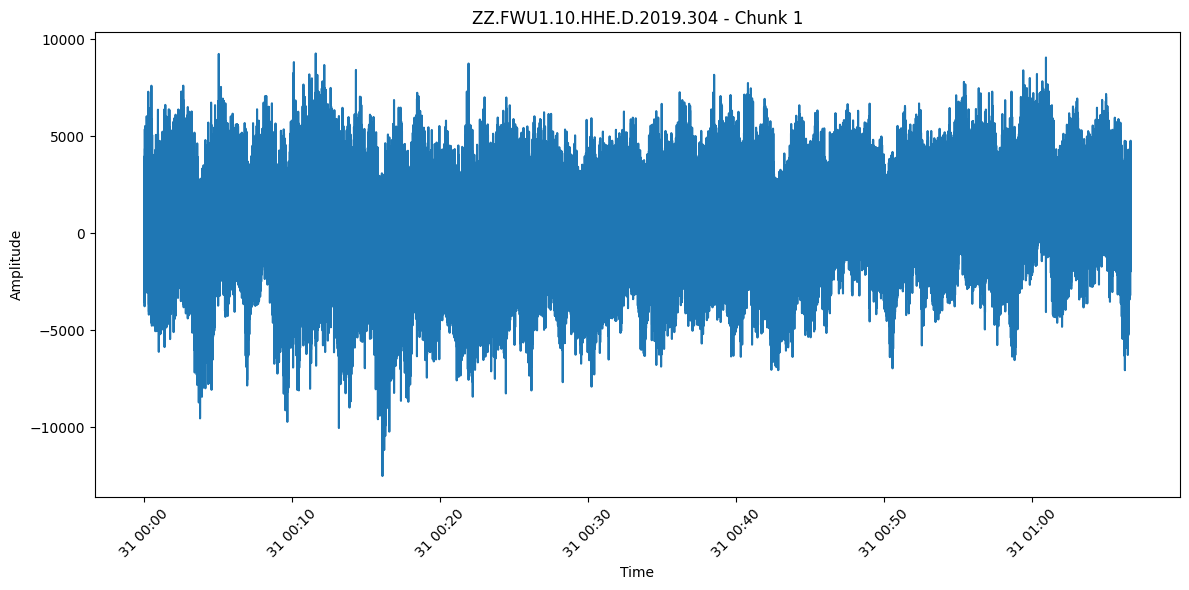

Plot displayed. Press Enter to continue...


In [ ]:
import os
import matplotlib.pyplot as plt
from obspy import read
import pandas as pd

def read_miniseed_to_dataframe(file_path, chunk_size=1000000):
    st = read(file_path)
    data = st[0].data
    start_time = st[0].stats.starttime
    sampling_rate = st[0].stats.sampling_rate
    
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i+chunk_size]
        time = pd.date_range(start=start_time.datetime, periods=len(chunk), freq=f'{1/sampling_rate}S')
        yield pd.DataFrame({'time': time, 'data': chunk})
        start_time += len(chunk) / sampling_rate

def plot_data(df, title=""):
    plt.figure(figsize=(12,6))
    plt.plot(df['time'], df['data'])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    root_directory = '/media/rsbiim/Extreme Pro/ZZ_clean/FWU1/HHE.D'
    chunk_size = 1000000  # Adjust this based on your memory constraints

    print(f"Starting processing. Root directory: {root_directory}, Chunk size: {chunk_size}")

    for dirpath, _, filenames in os.walk(root_directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            print(f"\nProcessing file: {file_path}")
            
            try:
                st = read(file_path)
                print(f"File read successfully. Number of traces: {len(st)}")
                
                for i, df in enumerate(read_miniseed_to_dataframe(file_path, chunk_size)):
                    print(f"Processing chunk {i+1}")
                    print(f"DataFrame shape: {df.shape}")
                    
                    title = f"{filename} - Chunk {i+1}"
                    print(f"Creating plot: {title}")
                    plot_data(df, title)
                    
                    print("Plot displayed. Press Enter to continue...")
                    
                    input()  # Wait for user input before continuing
                    
                    del df  # Clear the DataFrame to free up memory
            
            except Exception as e:
                print(f"Error processing file {file_path}: {str(e)}")

    print("Processing complete.")

if __name__ == "__main__":
    main()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def plot_violin_from_parquet(directory, date_start, date_end, nested_data_col):
    all_parquet_files = []
    for root, _, files in os.walk(directory):
        for file in files:
                all_parquet_files.append(os.path.join(root, file))
    
    print(f"Found {len(all_parquet_files)} Parquet files in the directory and its subdirectories.")
    
    all_data = []
    for file_path in all_parquet_files:
        try:
            print(f"Processing file: {file_path}")
            df = pd.read_parquet(file_path)
            
            # Extract nested data column
            if isinstance(df[nested_data_col].iloc[0], (list, dict)):
                df = df.explode(nested_data_col)
            
            # Convert nested data column to numeric if necessary
            df[nested_data_col] = pd.to_numeric(df[nested_data_col], errors='coerce')
            
            # Remove any rows with NaN values in the nested_data_col
            df = df.dropna(subset=[nested_data_col])
            
            if df.empty:
                print(f"Warning: No valid data in column '{nested_data_col}' for file {file_path}. Skipping this file.")
                continue
            
            all_data.append(df)
            print(f"Successfully processed file: {file_path}")
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
    
    if not all_data:
        print("No valid data found in the Parquet files.")
        return
    
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Generate a time axis label based on start and end dates
    time_label = f"{datetime.strptime(date_start, '%Y-%m-%d').year}-{datetime.strptime(date_end, '%Y-%m-%d').year}"
    
    # Plot a violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=[time_label] * len(combined_df), y=combined_df[nested_data_col])
    plt.xlabel('Time')
    plt.ylabel('Data Values')
    plt.title('Violin Plot of Nested Data')
    plt.show()

# Example usage:
directory = '/media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D'
plot_violin_from_parquet(directory, '2022-01-01', '2023-01-01', 'nested_data_column')

Found 55 Parquet files in the directory and its subdirectories.
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_9d314c37.358
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_818f7cca.359
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_fdde5607.345
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_79becd23.346
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_61453c16.347
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_8fcadbd0.348
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_4e613788.349
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_7ada5265.350
Processing file: /media/rsbiim/Extreme Pro/parquet/ZZ/FWU1/HHN.D/ZZ.FWU1.10.HHN.D.2019_141fdca1.351
Processing file: /media/rsbiim/Extre